In [42]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [3]:
mobile_df = pd.read_csv('train.csv')

In [4]:
col_names = mobile_df.columns.tolist()
col_names

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [5]:
mobile_df.shape

(2000, 21)

In [6]:
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [7]:
mobile_df['price_range'].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

<Axes: >

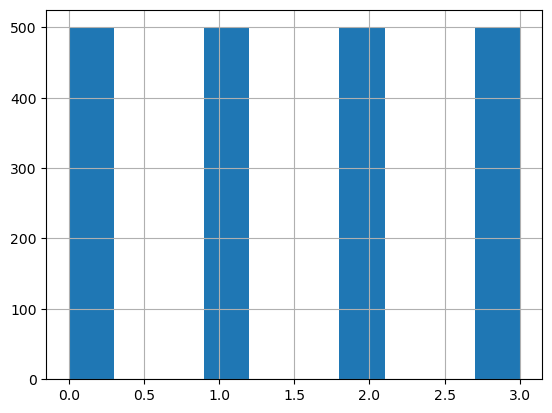

In [8]:
mobile_df['price_range'].hist()

In [9]:
target_col = mobile_df['price_range']
target_col

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [10]:
mobile_feat_space = mobile_df.drop('price_range', axis = 1)
mobile_feat_space.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [11]:
mobile_feat_space = pd.get_dummies(mobile_feat_space)

In [12]:
mobile_feat_space.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [13]:
features = mobile_feat_space.columns
list(features)

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi']

In [14]:
feature_mat = mobile_feat_space.values.astype(float)
feature_mat[1:5]

array([[1.021e+03, 1.000e+00, 5.000e-01, 1.000e+00, 0.000e+00, 1.000e+00,
        5.300e+01, 7.000e-01, 1.360e+02, 3.000e+00, 6.000e+00, 9.050e+02,
        1.988e+03, 2.631e+03, 1.700e+01, 3.000e+00, 7.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00],
       [5.630e+02, 1.000e+00, 5.000e-01, 1.000e+00, 2.000e+00, 1.000e+00,
        4.100e+01, 9.000e-01, 1.450e+02, 5.000e+00, 6.000e+00, 1.263e+03,
        1.716e+03, 2.603e+03, 1.100e+01, 2.000e+00, 9.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00],
       [6.150e+02, 1.000e+00, 2.500e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+01, 8.000e-01, 1.310e+02, 6.000e+00, 9.000e+00, 1.216e+03,
        1.786e+03, 2.769e+03, 1.600e+01, 8.000e+00, 1.100e+01, 1.000e+00,
        0.000e+00, 0.000e+00],
       [1.821e+03, 1.000e+00, 1.200e+00, 0.000e+00, 1.300e+01, 1.000e+00,
        4.400e+01, 6.000e-01, 1.410e+02, 2.000e+00, 1.400e+01, 1.208e+03,
        1.212e+03, 1.411e+03, 8.000e+00, 2.000e+00, 1.500e+01, 1.000e+00,
        1.000e+00, 

In [15]:
scaler = StandardScaler()
feature_mat = scaler.fit_transform(feature_mat)
feature_mat[1:5]

array([[-0.49513857,  1.0100505 , -1.2530642 ,  0.98117712, -0.99289039,
         0.95788598,  1.15502422,  0.68754816, -0.12005944, -0.66476784,
        -0.64598879,  0.58577791,  1.70446468,  0.46731702,  1.11426556,
        -0.63531667, -0.73426721,  0.55964063,  0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 ,  0.98117712, -0.53209893,
         0.95788598,  0.49354568,  1.38116548,  0.13424391,  0.20963905,
        -0.64598879,  1.39268422,  1.07496821,  0.44149774, -0.31017108,
        -0.86492153, -0.36814045,  0.55964063,  0.99401789, -1.01409939],
       [-1.41931861,  1.0100505 ,  1.19851653, -1.01918398, -0.99289039,
        -1.04396559, -1.2152739 ,  1.03435682, -0.26133908,  0.6468425 ,
        -0.15116781,  1.28674959,  1.23697097,  0.59456919,  0.87685946,
         0.51270767, -0.0020137 ,  0.55964063, -1.00601811, -1.01409939],
       [ 1.32590586,  1.0100505 , -0.39501094, -1.01918398,  2.00225408,
         0.95788598,  0.65891532,  0.34073951,  

In [16]:
pd.DataFrame(feature_mat).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,1.403322e-16,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,-1.635631e+00,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,-8.109291e-01,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,1.377252e-02,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,8.384742e-01,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,1.663176e+00,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01


In [18]:
feature_mat.shape

(2000, 20)

In [19]:
np.unique(target_col)

array([0, 1, 2, 3])

In [21]:
target = target_col.to_numpy()
target

array([1, 2, 2, ..., 3, 0, 3])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    feature_mat,
    target.reshape(-1,1),
    test_size = 0.10,
    random_state = 503
)
print(X_train.shape); print(X_test.shape); print(y_train.shape); print(y_test.shape)

(1800, 20)
(200, 20)
(1800, 1)
(200, 1)


In [25]:
y_test[:10]

array([[2],
       [2],
       [1],
       [3],
       [3],
       [0],
       [3],
       [0],
       [0],
       [3]])

In [29]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [39]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=4, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                1344      
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 16)                528       
                                                                 
 dense_15 (Dense)            (None, 4)                 68        
                                                                 
Total params: 4,020
Trainable params: 4,020
Non-trainable params: 0
_________________________________________________________________


In [45]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.1,  # Use 10% of the training data as validation
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping]
)

Epoch 1/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0379 - accuracy: 0.9969 - val_loss: 0.1858 - val_accuracy: 0.9333
Epoch 2/50
51/51 [==============================] - 0s 7ms/step - loss: 0.0339 - accuracy: 0.9957 - val_loss: 0.1723 - val_accuracy: 0.9056
Epoch 3/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0295 - accuracy: 0.9963 - val_loss: 0.2012 - val_accuracy: 0.9167
Epoch 4/50
51/51 [==============================] - 0s 7ms/step - loss: 0.0257 - accuracy: 0.9981 - val_loss: 0.1901 - val_accuracy: 0.9167
Epoch 5/50
51/51 [==============================] - 0s 6ms/step - loss: 0.0227 - accuracy: 0.9994 - val_loss: 0.1711 - val_accuracy: 0.9278
Epoch 6/50
51/51 [==============================] - 0s 9ms/step - loss: 0.0192 - accuracy: 0.9994 - val_loss: 0.1920 - val_accuracy: 0.9167
Epoch 7/50
51/51 [==============================] - 1s 18ms/step - loss: 0.0178 - accuracy: 1.0000 - val_loss: 0.1938 - val_accuracy: 0.9167
Epoch 8/50
51/51 [=

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

7/7 [==============================] - 0s 12ms/step - loss: 0.1313 - accuracy: 0.9500
Test Accuracy: 0.95


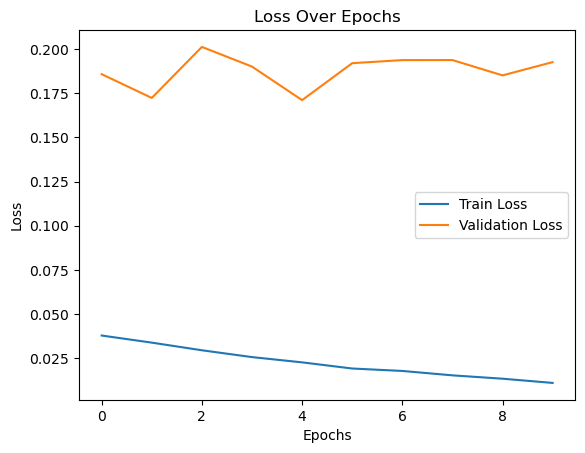

In [47]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

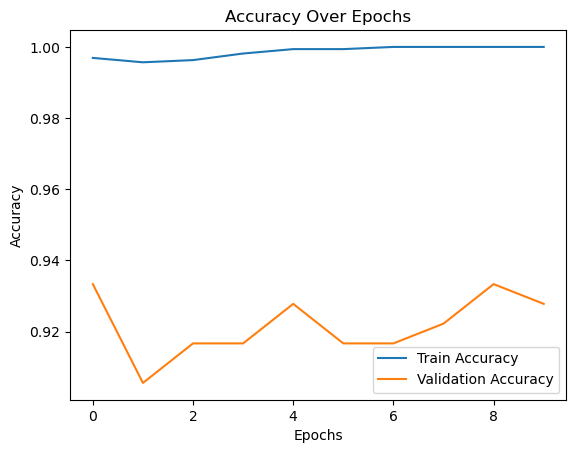

In [48]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [51]:
test_df = pd.read_csv('test.csv')

test_features = test_df.drop('price_range', axis=1, errors='ignore')

test_features = pd.get_dummies(test_features)
test_features = test_features.reindex(columns=mobile_feat_space.columns, fill_value=0)

test_features = scaler.transform(test_features.values.astype(float))

predictions = model.predict(test_features)

predicted_classes = np.argmax(predictions, axis=1)

test_df['predicted_price_range'] = predicted_classes

test_df.to_csv('test_with_predictions.csv', index=False)

test_df.head()


32/32 [==============================] - 0s 5ms/step


,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,...,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,749,810,1773,15,8,7,1,0,1,1
